## Kalman Filter Model

The Kalman filter model assumes the true state at time $k$ is evolved from the state at $k-1$ according to:

$$
\mathbf{x}_k = \mathbf{F}_k \mathbf{x}_{k-1} + \mathbf{B}_k \mathbf{u}_k + \mathbf{w}_k
$$

### Where:
- $\mathbf{F}_k$ is the **state transition model**, which is applied to the previous state $\mathbf{x}_{k-1}$;
- $\mathbf{B}_k$ is the **control-input model**, which is applied to the control vector $\mathbf{u}_k$;
- $\mathbf{w}_k$ is the **process noise**, which is assumed to be drawn from a zero mean **multivariate normal distribution** $\mathcal{N}$, with **covariance** $\mathbf{Q}_k$:
  $$
  \mathbf{w}_k \sim \mathcal{N}(\mathbf{0}, \mathbf{Q}_k).
  $$
At time $k$, an observation (or measurement) $\mathbf{z}_k$ of the true state $\mathbf{x}_k$ is made according to:

$$
\mathbf{z}_k = \mathbf{H}_k \mathbf{x}_k + \mathbf{v}_k
$$

### Where:
- $\mathbf{H}_k$ is the **observation model**, which maps the true state space into the observed space;
- $\mathbf{v}_k$ is the **observation noise**, which is assumed to be zero mean **Gaussian white noise** with **covariance** $\mathbf{R}_k$:
  $$
  \mathbf{v}_k \sim \mathcal{N}(\mathbf{0}, \mathbf{R}_k).
  $$
___

### Predict: 
$$\hat{x}_{k|k-1} = F_{k}\hat{x}_{k-1|k-1} + B_ku_k$$
$$P_{k|k-1} = F_{k}P_{k-1|k-1}F_{k}^T + Q_k$$
### Update: 
* Innovation:
$$\tilde{y}_k = z_k - H\hat{x}_{k|k-1}$$
* Innovation covariance: 
$$S_k = H_kP_{k|k-1}H_k^T + R_k$$
* Optimal Kalman gain: 
$$K_k = P_{k|k-1}H_k^TS_k^{-1}$$
* Updated state estimate:
$$\hat{\mathbf{x}}_{k \mid k} = \hat{\mathbf{x}}_{k \mid k-1} + \mathbf{K}_k \tilde{\mathbf{y}}_k$$
* Updated estimate covariance:
$$P_{k|k} = (I - K_kH_k)P_{k|k-1}$$






In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# In 1D: constant velocity model 
class Kalman_filter: 
    def __init__(self, F, Q, H, R, x, P, B = None, u = None):
        self.F = F                                          # transition matrix
        self.B = B if B is not None else np.zeros_like(x)   # control input matrix
        self.u = u if u is not None else np.zeros_like(x)   # control input
        self.Q = Q                                          # motion noise covariance
        self.H = H                                          # observation matrix 
        self.R = R                                          # measurement noise covariance 
        self.x = x                                          # initial state
        self.P = P                                          # error estimate covariance 
        self.I = np.eye(len(self.x))
        self.state_history = [] 
    def predict(self): 
        self.x = self.F @ self.x # temporary no control input
        self.P = self.F @ self.P @ self.F.T + self.Q 
    def update(self, z): 
        S = self.H @ self.P @ self.H.T + self.R  # Innovation covariance
        K = self.P @ self.H.T @ np.linalg.inv(S) # Kalman gain
        y = z - self.H @ self.x                  # Innovation
        self.x = self.x + K @ y
        self.P = (self.I - K @ self.H) @ self.P
        self.state_history.append(self.x.copy())
        print(f"Updated state: {self.x}")
    def generateRandomObservation(self, n): 
        observations = []
        observation = self.x
        for i in range(1,n+1):
            noise = np.random.multivariate_normal(mean = np.zeros(len(self.H @ self.x)), cov = self.R, size=1).T
            observation = self.F @ observation
            observations.append(self.H @ observation + noise)
        return np.array([obs.flatten() for obs in observations])
    def visualise(self, n): 
        observations = self.generateRandomObservation(n)  
        for z in observations: 
            self.predict() 
            self.update(z) 
        self.state_history = np.array([state.flatten() for state in self.state_history])
        # Example modification for x-axis ticks
        print(observations[0])
        plt.plot(range(1, n+1), observations[:, 0], label="Observations", linestyle="--", marker='o')
        plt.plot(range(1, n+1), self.state_history[:, 0], label="Estimated State", linestyle="-", marker='s')
        
        plt.xlabel("Time Step")
        plt.ylabel("State")
        plt.title("Kalman Filter State Estimation")
        
        # Set specific x-axis ticks to display only 1 and 2
        plt.xticks([1, 2])     
        plt.legend()
        plt.grid()
        plt.show()

        

Updated state: [[0.64861117]
 [0.82517968]]
Updated state: [[0.54544131]
 [0.36100491]]
Updated state: [[2.4972511 ]
 [1.00232426]]
Updated state: [[4.33000008]
 [1.27645062]]
Updated state: [[4.70672494]
 [1.02300419]]
Updated state: [[5.49226943]
 [0.96349824]]
Updated state: [[5.70594871]
 [0.78994665]]
Updated state: [[7.51080459]
 [1.01381435]]
Updated state: [[8.50590074]
 [1.00978615]]
Updated state: [[10.17141614]
 [ 1.14959343]]
[0.47379085]


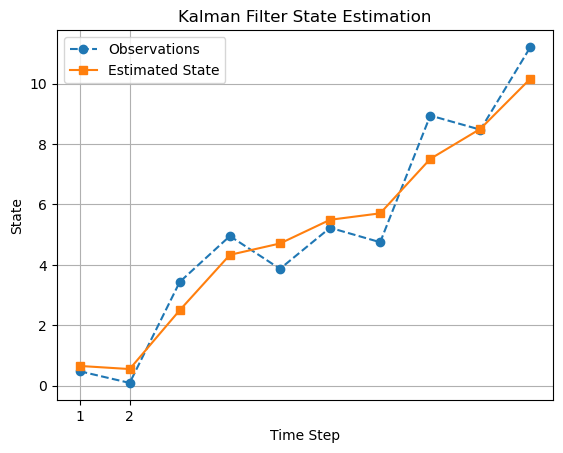

In [142]:
# Test with 1D constant velocity model 
F = np.array([[1, 1], [0, 1]]) 
Q = np.array([[0.01, 0],[0, 0.01]]) 
H = np.array([[1, 0]]) 
R = np.array([[1]])
x = np.array([[0], [1]]) 
P = np.array([[1, 0],[0, 1]])
v1 = Kalman_filter(F, Q, H, R, x, P)
v1.visualise(10)

Updated state: [[1.84374509]
 [1.41977368]]
Updated state: [[2.50266819]
 [1.03934839]]
Updated state: [[2.77644422]
 [0.73071445]]
Updated state: [[3.5549042 ]
 [0.74647543]]
Updated state: [[4.33390849]
 [0.75563859]]
Updated state: [[6.0876743 ]
 [1.00576318]]
Updated state: [[6.71785716]
 [0.91883211]]
Updated state: [[8.42337003]
 [1.09235739]]
Updated state: [[9.4246838]
 [1.0727646]]
Updated state: [[10.16640922]
 [ 1.00218412]]
[2.26351877]


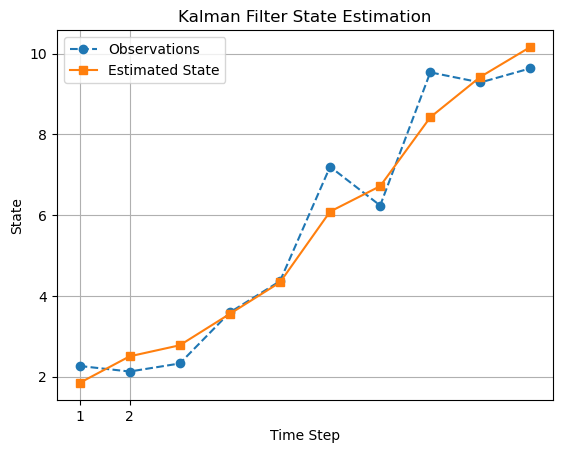

In [140]:
# 2D estimation: 


In [225]:
# Using FilterPy
import filterpy 
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from filterpy.stats import plot_covariance_ellipse
from kf_book.book_plots import plot_filter
from kf_book.book_plots import plot_measurements

In [242]:
class PosSensor(): 
    def __init__(self, pos=[0,0], vel = [0, 0], noise_std=1): 
        self.vel = vel
        self.pos = pos 
        self.noise_std = noise_std
    def read(self): 
        self.pos[0] += self.vel[0]
        self.pos[1] += self.vel[1]
        return [self.pos[0] + np.random.randn() * self.noise_std, 
                self.pos[1] + np.random.randn() * self.noise_std] 
R_std = 0.35 
Q_std = 0.04
def tracker1(): 
    tracker = KalmanFilter(dim_x = 4, dim_z = 2) 
    dt = 1.0 # time_step
    tracker.F = np.array([[1, dt, 0, 0], 
                        [0, 1, 0, 0], 
                        [0, 0, 1, dt], 
                         [0, 0, 0, 1]])
    q = Q_discrete_white_noise(dim = 2, dt = dt, var = Q_std**2)
    tracker.u = 0.
    tracker.H = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])
    tracker.x = np.array([0, 0, 0, 0]).T
    tracker.P = np.eye(4)*500.
    return tracker

In [276]:
N = 30 
sensor = PosSensor([0, 0], [2, 1], noise_std = R_std) 
zs = np.array([sensor.read() for _ in range(N)])
robot = tracker1() 

In [277]:
mu, cov, _, _ = robot.batch_filter(zs)

In [ ]:
##### for x, P in zip(mu, cov): 
    mean = np.array([x[0], x[2]])
    cov = np.array([[P[0, 0], P[2, 0]],
                    [P[0, 2], P[2, 2]]])
    plot_covariance_ellipse(mean, cov, fc='r', std=3, alpha = 0.5)
plot_filter(mu[:, 0], mu[:, 2])
plot_measurements(zs[:, 0], zs[:, 1])
plt.legend(loc=2)
plt.xlim(0, 70);

In [279]:
def g2(x): 
    return (np.cos(3*(x/2 + 0.7))) * np.sin(0.3*x) - 1.6*x

In [280]:
from kf_book.nonlinear_plots import plot_nonlinear_func
from numpy.random import normal

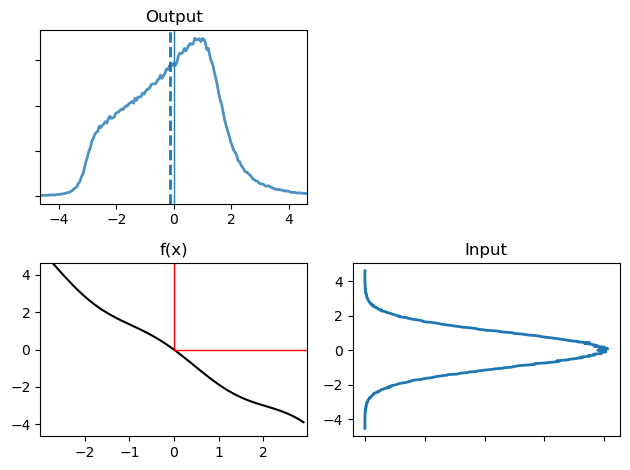

In [281]:
data = normal(loc = 0., scale = 1., size = 500000) 
plot_nonlinear_func(data, g2) 

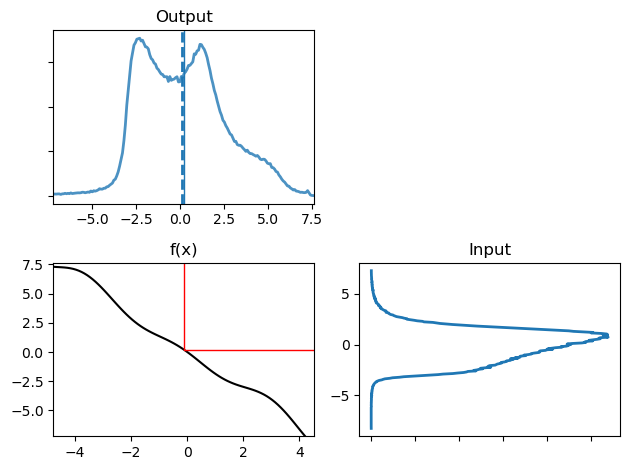

In [282]:
y = g2(data) 
plot_nonlinear_func(y, g2)

# Linear 2D system: 

A simple example with only position and velocity
Tracking an object with constant velocity: 

In [398]:
import filterpy 
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise # Piecewise white noise model 
from scipy.linalg import block_diag
from filterpy.stats import plot_covariance_ellipse
from kf_book.book_plots import plot_filter
from kf_book.book_plots import plot_measurements
from filterpy.common import Saver

In [442]:
# Simulate the object system: 
class object1(): 
    def __init__(self, pos = [0, 0], vel = [0, 0], noise_std = 1.): 
        self.pos = pos
        self.vel = vel
        self.noise_std = noise_std
    def read(self): 
        self.pos[0] += self.vel[0]
        self.pos[1] += self.vel[1]
        return [self.pos[0] + np.random.randn() * self.noise_std, 
                self.pos[1]
                + np.random.randn() * self.noise_std] 

In [443]:
# Create the filter: 
dt = 1
Q_std = 0.04
R_std = 0.35
tracker = KalmanFilter(dim_x = 4, dim_z = 2) 
tracker.F = np.array([[1, dt, 0, 0], 
                      [0, 1, 0, 0], 
                      [0, 0, 1, dt], 
                      [0, 0, 0, 1]]) 
tracker.u = 0.
q = Q_discrete_white_noise(dim = 2, dt = dt) 
tracker.Q = block_diag(q, q)
tracker.R = np.eye(2) * R_std**2
tracker.H = np.array([[1, 0, 0, 0], 
                      [0, 0, 1, 0]]) 
tracker.x = np.array([[0, 0, 0, 0]]).T
tracker.P = np.eye(4) * 5.

In [444]:
def filter_data(kf, zs):
    s = Saver(kf)
    kf.batch_filter(zs, saver=s)
    s.to_array()
    return s

In [445]:
# Run 
o = object1(vel = [2, 3], pos = [0, 0], noise_std = 1.**2) 
N = 50 # number of measurements 
zx = np.array([o.read() for _ in range(N)])
data = filter_data(tracker, zx)

(<matplotlib.collections.PathCollection at 0x14ca1e1d0>,)

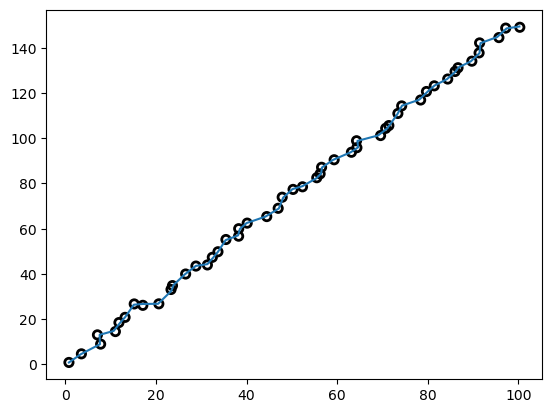

In [483]:
# Plot 
plot_filter(data.x[:, 0], data.x[:, 2])
plot_measurements(zx[:, 0], zx[:, 1])

### Evaluating filter performance 

In [329]:
# Plot the residuals 
from kf_book.book_plots import plot_residual_limits, set_labels

In [479]:
def plot_residuals(zx,      # residuals 
                   data,    # data 
                   col,     # the index of the variable we want to plot in the state variable vectors.
                   title="Residuals Over Time", 
                   y_label="Residuals", 
                   stds=1): # the number of standard deviations for residual bounds
    res = zx[:, 0] - data.x[:, col, col]
    plt.plot(res)
    plot_residual_limits(data.P[:, col, col], stds)
    set_labels(title, 'time (sec)', y_label)

[  0.77234311   3.4553135    7.62128909   7.56463682  10.66002796
  12.03348369  13.19727384  15.10902995  17.09025265  20.46793995
  23.37971991  23.91485546  26.32513477  28.81818697  31.34952626
  32.58926156  33.6961816   35.37924877  38.12496601  38.53671319
  40.01098045  44.15228212  47.12436849  48.09393152  50.13956626
  52.3387916   55.40333105  56.4719192   56.65857661  59.07964088
  62.98822926  64.62754438  64.4816321   69.04127813  71.03008397
  71.57669215  73.27352451  74.32819897  78.11719256  79.9523029
  81.47115462  84.26656922  86.14338762  86.82697273  89.5073205
  91.43384305  91.64886783  95.31024687  97.41084923 100.24002239]
[  0.78157355   3.53283862   7.78160917   7.07670318  11.03712445
  11.82471495  13.17846289  15.19597374  17.09602344  20.62920321
  23.32167772  23.64165408  26.54897435  28.82193946  31.35385427
  32.43985648  33.68471118  35.44614187  38.24605678  38.26379083
  40.14088404  44.45718198  46.98130159  47.86618247  50.26986272
  52.353159

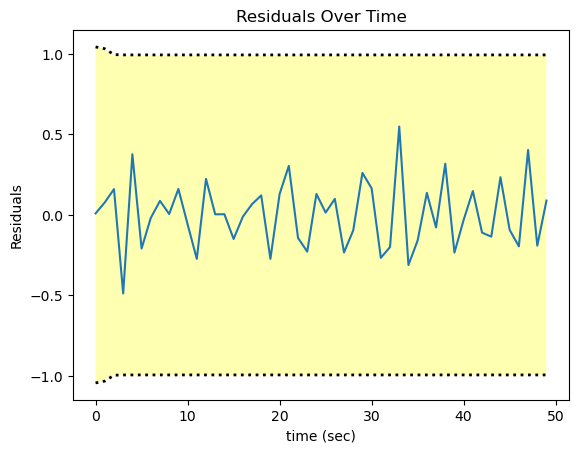

In [482]:
plot_residuals(zx, data, col= 0, stds=3) 
# Well within 3 stds  

## Bearing 

In [503]:
from filterpy.kalman import MerweScaledSigmaPoints
from filterpy.kalman import UnscentedKalmanFilter as UKF
import math
from numpy.random import randn

In [546]:
def bearing(sensor, target_pos):
    return math.atan2(target_pos[1] - sensor[1], 
                      target_pos[0] - sensor[0])

In [547]:
def measurement(A_pos, B_pos, pos):
    angle_a = bearing(A_pos, pos)
    angle_b = bearing(B_pos, pos)
    return [angle_a, angle_b]

In [548]:
def fx(x, dt):
    x[0] += x[1] * dt
    x[2] += x[3] * dt
    return x

In [549]:
sa_pos = [-400, 0] # Position of sensor A
sb_pos = [400, 0]  # Position of sensor B

def hx(x):
    pos = (x[0], x[2])
    return measurement(sa_pos, sb_pos, pos)

In [550]:
target_pos = [100, 200]
std_noise = math.radians(0.2) # measurement noise
points = MerweScaledSigmaPoints(n = 4, alpha = 1., beta = 2., kappa = -1)
f = UKF(dim_x = 4, dim_z = 2, dt = dt, hx = hx, fx = fx, points = points) 
f.x = np.array([target_pos[0], 1., target_pos[1], 1.])
q = Q_discrete_white_noise(2, dt, var = 1)
f.Q[0:2, 0:2] = q
f.Q[2:4, 2:4] = q
f.R *= std_noise**2
f.P *= 1000  # initial system noise

[0.37880882738945465, 2.5461865710824254]
[0.38113391872157104, 2.5460894041852447]
[0.3810427017154221, 2.543018827441497]
[0.38544727129043, 2.5410572720924707]
[0.38084624229753916, 2.5363132267146162]
[0.38060683155763175, 2.53360831678939]
[0.3870365896390148, 2.531192562201387]
[0.3821632340527585, 2.5238237141699518]
[0.38303573660405155, 2.511344532386921]
[0.3903020275388111, 2.5201089356176327]
[0.3952571809191549, 2.5130043335149534]
[0.392628688972407, 2.510477382132272]
[0.3945219423147324, 2.504763686402611]
[0.3955310007435085, 2.503497737434985]
[0.39870610057487355, 2.501486443442163]
[0.3918559767801016, 2.489448198585723]
[0.39450944907212265, 2.4870593699220875]
[0.39616471356298705, 2.484148054642833]
[0.40446631045804343, 2.477196658212847]
[0.39534880428359187, 2.47189828737825]
[0.40146231569990987, 2.4669680733969765]
[0.40490652225782997, 2.4659612148134764]
[0.40200629201193105, 2.4685197465949225]
[0.39846888614584786, 2.461453901529037]
[0.4056488353359967,

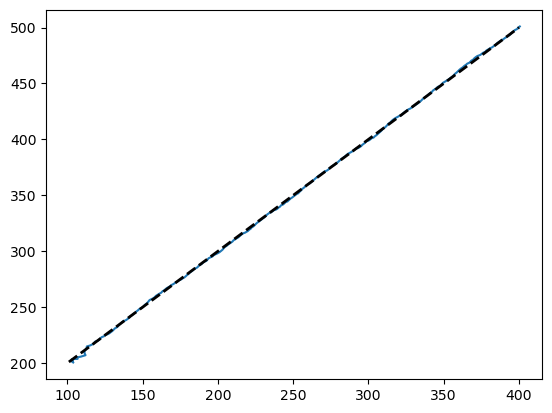

In [551]:
def plot_straight_line_target(f, std_noise): 
    xs, txs = [], [] # estimated pos, simulated pos 
    for i in range(300): 
        target_pos[0] += 1 + randn()*0.0001
        target_pos[1] += 1 + randn()*0.0001
        txs.append([target_pos[0], target_pos[1]]) 
        z = measurement(sa_pos, sb_pos, target_pos) 
        z[0] += randn() * std_noise
        z[1] += randn() * std_noise
        print(z)
        f.predict() 
        f.update(z)    
        xs.append(f.x) 

    xs = np.asarray(xs)
    txs = np.asarray(txs)
    plt.plot(xs[:, 0], xs[:, 2])
    plt.plot(txs[:, 0], txs[:, 1], ls='--', lw=2, c='k')
    plt.show() 

plot_straight_line_target(f, std_noise)

## 3D to 2D projection 
### Using pinhole camera model 


In [733]:
# Assuming world origin, object origin and camera origin are the same and don't need any transformation. 
std_noise = 0.1
f_x, f_y  = 800, 800
target_pos = [100, 200, 300]
dt = 1 
def hx(x):
    X = x[0]
    Y = x[2]
    Z = x[4]
    u = f_x * (X / Z)
    v = f_y * (Y / Z)
    return np.array([u, v])
def fx(x, dt): 
    x[0] += x[1] * dt
    x[2] += x[3] * dt
    x[4] += x[5] * dt
    return x
def measurement(target_pos): 
    x = target_pos[0] 
    y = target_pos[1] 
    z = target_pos[2] 
    u = f_x * (x / z)
    v = f_y * (y / z) 
    return [u, v]
points = MerweScaledSigmaPoints(n=6, alpha=0.1, beta=2.0, kappa=-3)
f = UKF(dim_x=6, dim_z=2, dt=dt, fx=fx, hx=hx, points=points)
f.x = np.array([target_pos[0], 1., target_pos[1], 1., target_pos[2], 1.])
f.Q *= 0.1 
f.R = np.array([[0.5, 0], [0, 0.5]])
f.P *= 10

In [734]:
xs, txs = [], [] # estimated pos, simulated pos 
for i in range(30): 
    target_pos[0] += 1 + randn()*0.0001
    target_pos[1] += 1 + randn()*0.0001
    target_pos[2] += 1 + randn()*0.0001
    txs.append([target_pos[0], target_pos[1], target_pos[2]]) 
    z = measurement(target_pos) + np.random.normal(0, std_noise , size=2)
    f.predict() 
    f.update(z)  
    xs.append(f.x) 

#print(target_pos)

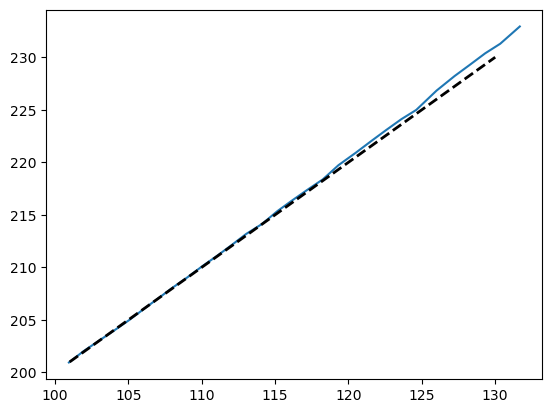

In [735]:
xs = np.asarray(xs)
txs = np.asarray(txs)
plt.plot(xs[:, 0], xs[:, 2])
plt.plot(txs[:, 0], txs[:, 1], ls='--', lw=2, c='k')
plt.show() 